<a href="https://colab.research.google.com/github/hwpark0826/HK-M-Project/blob/main/02_final_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Final model

## 데이터 불러오기

In [ ]:
df_all=pd.read_csv('df_all.csv')

## 데이터 분할 및 학습

In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split
data_all = df_all.copy()
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    data_all.drop("PHI_BENEFIT", axis=1),
    data_all["PHI_BENEFIT"],
    test_size=0.2,
    random_state=42
)

In [ ]:
# 모델 객체 생성
from lightgbm import LGBMRegressor, early_stopping

LGBM = LGBMRegressor(
    objective="regression",
    metric = "mae",
    random_state=42,
    learning_rate=0.1,
    max_depth=4,  # max_depth 설정
    n_estimators=500  # n_estimators 설정
)

In [ ]:
# Validation Set 분리 (Train에서 일부 떼어냄)
X_valid_all, X_test_all, y_valid_all, y_test_all = train_test_split(
    X_train_all, y_train_all, test_size=0.5, random_state=42
)

In [ ]:
# 평가용 데이터셋
eval_set = [(X_valid_all, y_valid_all)]

# 모델 학습 (early_stopping_rounds 5 설정)
LGBM.fit(
    X_train_all, y_train_all,
    eval_set=eval_set,  # eval_set을 추가
    callbacks=[early_stopping(5)]  # early stopping 설정
)

# 최적화된 모델 저장
best_lgbm_all = LGBM

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1670
[LightGBM] [Info] Number of data points in the train set: 3613, number of used features: 22
[LightGBM] [Info] Start training from score 14.131569
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

## 예측 및 성능평가

In [ ]:
# 예측
y_pred_train_all = best_lgbm_all.predict(X_train_all)
y_pred_test_all = best_lgbm_all.predict(X_test_all)

In [ ]:
# 성능 평가 지표 계산
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_train_all = mean_squared_error(y_train_all, y_pred_train_all)
rmse_train_all = np.sqrt(mse_train_all)
mae_train_all = mean_absolute_error(y_train_all, y_pred_train_all)
r2_train_all = r2_score(y_train_all, y_pred_train_all)

mse_test_all = mean_squared_error(y_test_all, y_pred_test_all)
rmse_test_all = np.sqrt(mse_test_all)
mae_test_all = mean_absolute_error(y_test_all, y_pred_test_all)
r2_test_all = r2_score(y_test_all, y_pred_test_all)

# 결과 출력
print("--- Training Set Performance (New Data) ---")
print(f"MSE: {mse_train_all:.4f}")
print(f"RMSE: {rmse_train_all:.4f}")
print(f"MAE: {mae_train_all:.4f}")
print(f"R² Score: {r2_train_all:.4f}\n")

print("--- Test Set Performance (New Data) ---")
print(f"MSE: {mse_test_all:.4f}")
print(f"RMSE: {rmse_test_all:.4f}")
print(f"MAE: {mae_test_all:.4f}")
print(f"R² Score: {r2_test_all:.4f}")

--- Training Set Performance (New Data) ---
MSE: 0.9873
RMSE: 0.9936
MAE: 0.6949
R² Score: 0.9683

--- Test Set Performance (New Data) ---
MSE: 0.9096
RMSE: 0.9537
MAE: 0.6797
R² Score: 0.9704


## 피처중요도

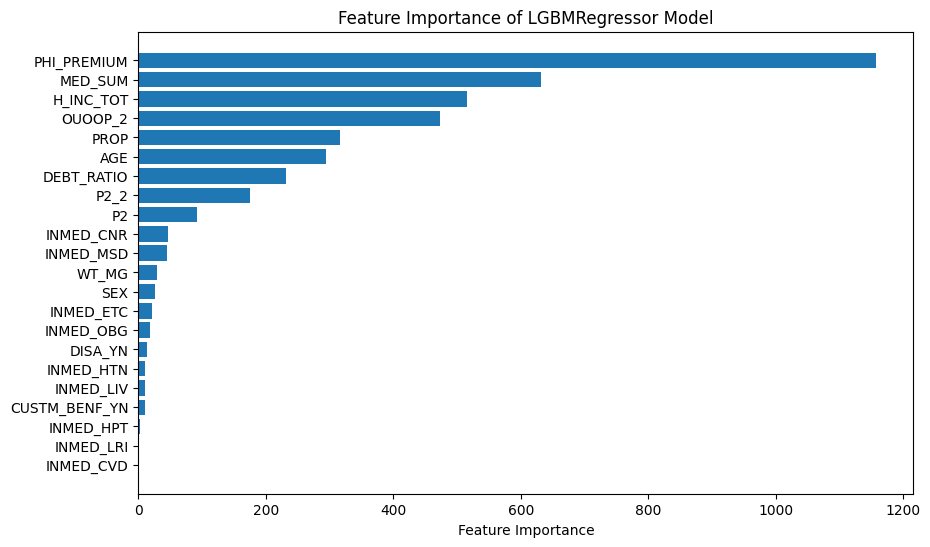

In [ ]:
import matplotlib.pyplot as plt

# 피쳐 중요도 출력
importance = best_lgbm_all.feature_importances_
feature_names = X_train_all.columns

# 피쳐 중요도를 데이터프레임으로 묶고, 중요도 기준으로 내림차순 정렬
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

# 중요도 기준으로 내림차순 정렬
importance_df = importance_df.sort_values(by='Importance')

# 피쳐 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance of LGBMRegressor Model')
plt.show()

# LGBM_concat_grid_search

## 데이터 분포 확인

In [ ]:
df_all=pd.read_csv('df_all.csv')

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4517 entries, 0 to 4516
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PHI_BENEFIT    4517 non-null   float64
 1   PHI_PREMIUM    4517 non-null   float64
 2   H_INC_TOT      4517 non-null   float64
 3   DEBT_RATIO     4517 non-null   float64
 4   PROP           4517 non-null   float64
 5   CUSTM_BENF_YN  4517 non-null   float64
 6   P2             4517 non-null   float64
 7   P2_2           4517 non-null   float64
 8   SEX            4517 non-null   float64
 9   DISA_YN        4517 non-null   float64
 10  AGE            4517 non-null   float64
 11  WT_MG          4517 non-null   int64  
 12  INMED_CNR      4517 non-null   float64
 13  INMED_CVD      4517 non-null   float64
 14  INMED_ETC      4517 non-null   float64
 15  INMED_HPT      4517 non-null   float64
 16  INMED_HTN      4517 non-null   float64
 17  INMED_LIV      4517 non-null   float64
 18  INMED_LR

<Axes: >

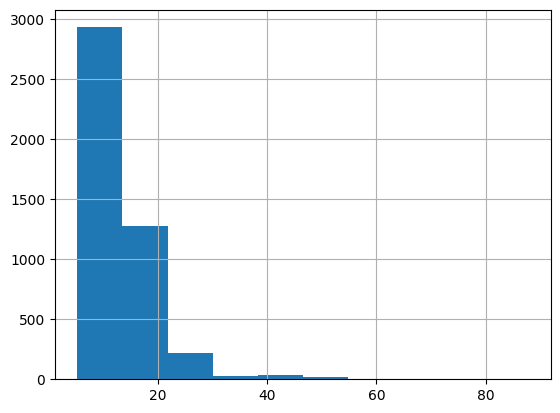

In [ ]:
df_all['PHI_BENEFIT'].hist()

In [ ]:
df_all['PHI_BENEFIT'].std()

5.5307673896735245

## 모든 변수 활용

In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split
data_all = df_all.copy()
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    data_all.drop("PHI_BENEFIT", axis=1),
    data_all["PHI_BENEFIT"],
    test_size=0.2,
    random_state=42
)
# 그리드서치
from sklearn.model_selection import GridSearchCV

# 파라미터 설정
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4],
    'n_estimators': [500, 1000, 1500]
}

# 모델 객체 생성
from lightgbm import LGBMRegressor, early_stopping

LGBM = LGBMRegressor(
    objective = "regression",
    random_state=42)

#GridSearchCV 객체생성
grid_search = GridSearchCV(
    estimator=LGBM,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
    verbose=100
)

# 평가용 데이터셋
eval_set = [(X_test_all, y_test_all)]

# 그리드 서치 실행
grid_search.fit(X_train_all, y_train_all,
                eval_set=eval_set,  # eval_set을 추가
                callbacks=[early_stopping(5)])  # early stopping을 위한 rounds 설정

# 최적화된 모델 저장
best_lgbm_all = grid_search.best_estimator_

print("Best Hyperparameters (New Data):", grid_search.best_params_)

# 예측 및 성능 평가
y_pred_train_all = best_lgbm_all.predict(X_train_all)
y_pred_test_all = best_lgbm_all.predict(X_test_all)

# 성능 평가 지표 계산
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_train_all = mean_squared_error(y_train_all, y_pred_train_all)
rmse_train_all = np.sqrt(mse_train_all)
mae_train_all = mean_absolute_error(y_train_all, y_pred_train_all)
r2_train_all = r2_score(y_train_all, y_pred_train_all)

mse_test_all = mean_squared_error(y_test_all, y_pred_test_all)
rmse_test_all = np.sqrt(mse_test_all)
mae_test_all = mean_absolute_error(y_test_all, y_pred_test_all)
r2_test_all = r2_score(y_test_all, y_pred_test_all)

# 결과 출력
print("--- Training Set Performance (New Data) ---")
print(f"MSE: {mse_train_all:.4f}")
print(f"RMSE: {rmse_train_all:.4f}")
print(f"MAE: {mae_train_all:.4f}")
print(f"R² Score: {r2_train_all:.4f}\n")

print("--- Test Set Performance (New Data) ---")
print(f"MSE: {mse_test_all:.4f}")
print(f"RMSE: {rmse_test_all:.4f}")
print(f"MAE: {mae_test_all:.4f}")
print(f"R² Score: {r2_test_all:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1670
[LightGBM] [Info] Number of data points in the train set: 3613, number of used features: 22
[LightGBM] [Info] Start training from score 14.131569
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

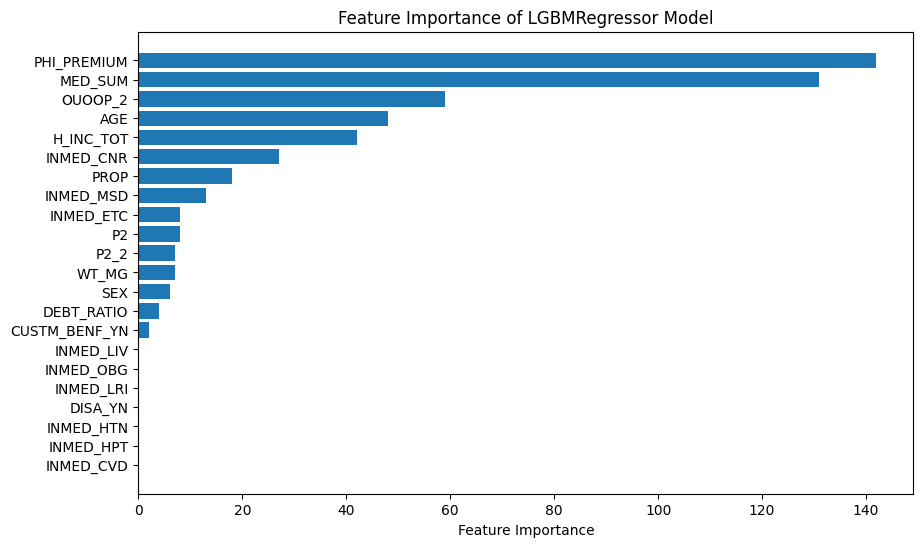

In [ ]:
import matplotlib.pyplot as plt

# 피쳐 중요도 출력
importance = best_lgbm_all.feature_importances_
feature_names = X_train_all.columns

# 피쳐 중요도를 데이터프레임으로 묶고, 중요도 기준으로 내림차순 정렬
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

# 중요도 기준으로 내림차순 정렬
importance_df = importance_df.sort_values(by='Importance')

# 피쳐 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance of LGBMRegressor Model')
plt.show()

## 명목형 모두 drop

In [ ]:
data_all = df_all.drop(columns=['SEX','INMED_MSD','INMED_CNR','INMED_OBG','INMED_LRI','INMED_LIV','INMED_HTN','INMED_HPT','INMED_ETC','INMED_CVD','WT_MG', 'DISA_YN', 'CUSTM_BENF_YN']).copy()

In [ ]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4517 entries, 0 to 4516
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PHI_BENEFIT  4517 non-null   float64
 1   PHI_PREMIUM  4517 non-null   float64
 2   H_INC_TOT    4517 non-null   float64
 3   DEBT_RATIO   4517 non-null   float64
 4   PROP         4517 non-null   float64
 5   P2           4517 non-null   float64
 6   P2_2         4517 non-null   float64
 7   AGE          4517 non-null   float64
 8   OUOOP_2      4517 non-null   float64
 9   MED_SUM      4517 non-null   float64
dtypes: float64(10)
memory usage: 353.0 KB


In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    data_all.drop("PHI_BENEFIT", axis=1),
    data_all["PHI_BENEFIT"],
    test_size=0.2,
    random_state=42
)
# 그리드서치
from sklearn.model_selection import GridSearchCV

# 파라미터 설정
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4],
    'n_estimators': [500, 1000, 1500]
}

# 모델 객체 생성
from lightgbm import LGBMRegressor, early_stopping

LGBM = LGBMRegressor(
    objective = "regression",
    random_state=42)

#GridSearchCV 객체생성
grid_search = GridSearchCV(
    estimator=LGBM,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
    verbose=100
)

# 평가용 데이터셋
eval_set = [(X_test_all, y_test_all)]

# 그리드 서치 실행
grid_search.fit(X_train_all, y_train_all,
                eval_set=eval_set,  # eval_set을 추가
                callbacks=[early_stopping(5)])  # early stopping을 위한 rounds 설정

# 최적화된 모델 저장
best_lgbm_all = grid_search.best_estimator_

print("Best Hyperparameters (New Data):", grid_search.best_params_)

# 예측 및 성능 평가
y_pred_train_all = best_lgbm_all.predict(X_train_all)
y_pred_test_all = best_lgbm_all.predict(X_test_all)

# 성능 평가 지표 계산
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_train_all = mean_squared_error(y_train_all, y_pred_train_all)
rmse_train_all = np.sqrt(mse_train_all)
mae_train_all = mean_absolute_error(y_train_all, y_pred_train_all)
r2_train_all = r2_score(y_train_all, y_pred_train_all)

mse_test_all = mean_squared_error(y_test_all, y_pred_test_all)
rmse_test_all = np.sqrt(mse_test_all)
mae_test_all = mean_absolute_error(y_test_all, y_pred_test_all)
r2_test_all = r2_score(y_test_all, y_pred_test_all)

# 결과 출력
print("--- Training Set Performance (New Data) ---")
print(f"MSE: {mse_train_all:.4f}")
print(f"RMSE: {rmse_train_all:.4f}")
print(f"MAE: {mae_train_all:.4f}")
print(f"R² Score: {r2_train_all:.4f}\n")

print("--- Test Set Performance (New Data) ---")
print(f"MSE: {mse_test_all:.4f}")
print(f"RMSE: {rmse_test_all:.4f}")
print(f"MAE: {mae_test_all:.4f}")
print(f"R² Score: {r2_test_all:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1644
[LightGBM] [Info] Number of data points in the train set: 3613, number of used features: 9
[LightGBM] [Info] Start training from score 14.131569
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

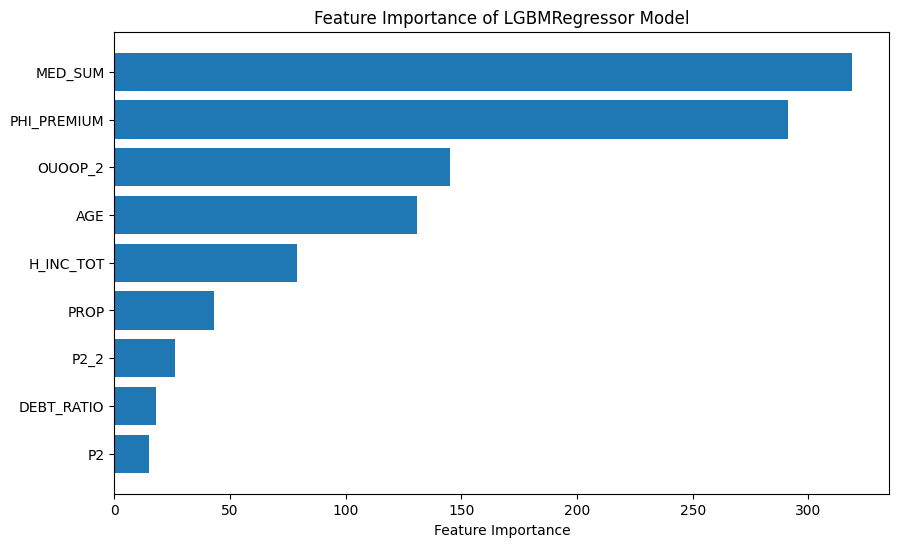

In [ ]:
import matplotlib.pyplot as plt

# 피쳐 중요도 출력
importance = best_lgbm_all.feature_importances_
feature_names = X_train_all.columns

# 피쳐 중요도를 데이터프레임으로 묶고, 중요도 기준으로 내림차순 정렬
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

# 중요도 기준으로 내림차순 정렬
importance_df = importance_df.sort_values(by='Importance')

# 피쳐 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance of LGBMRegressor Model')
plt.show()

# LGBM_progressive

### 데이터 불러오기 (점진학습이므로 연도별로 따로 불러옴)

In [ ]:
df_2019=pd.read_csv("df_2019.csv")
df_2020=pd.read_csv("df_2020.csv")
df_2021=pd.read_csv("df_2021.csv")

### 2019년 모델 학습

In [ ]:
data_2019 = df_2019.copy()

In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train_2019, X_test_2019, y_train_2019, y_test_2019 = train_test_split(
    data_2019.drop("PHI_BENEFIT", axis=1),
    data_2019["PHI_BENEFIT"],
    test_size=0.2,
    random_state=42
)

X_train_2019, X_valid_2019, y_train_2019, y_valid_2019 = train_test_split(
    X_train_2019,
    y_train_2019,
    test_size=0.2,
    random_state=42
)

In [ ]:
# 그리드서치
from sklearn.model_selection import GridSearchCV

# 파라미터 설정
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 500],
}

In [ ]:
# 모델 객체 생성
from lightgbm import LGBMRegressor, early_stopping

LGBM = LGBMRegressor(
    objective = "regression",
    random_state=42)

In [ ]:
#GridSearchCV 실행 (최초 학습 단계)
grid_search = GridSearchCV(
    estimator=LGBM,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
    verbose=100
)

In [ ]:
# early stopping 설정
early_stopping_callback = early_stopping(stopping_rounds=5, verbose=True)

In [ ]:
# 모델 학습 (callbacks 추가)
grid_search.fit(X_train_2019, y_train_2019, eval_set=[(X_valid_2019, y_valid_2019)], callbacks=[early_stopping_callback])

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1209
[LightGBM] [Info] Number of data points in the train set: 670, number of used features: 19
[LightGBM] [Info] Start training from score 14.876414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

GridSearchCV(cv=5,
             estimator=LGBMRegressor(objective='regression', random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_mean_absolute_error', verbose=100)

In [ ]:
# 최적 하이퍼파라미터 적용된 모델 저장
best_lgbm_2019 = grid_search.best_estimator_

print("Best Hyperparameters (Initial Training):", grid_search.best_params_)

Best Hyperparameters (Initial Training): {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}


In [ ]:
# 예측
# 학습 데이터에 대한 예측
y_pred_train_2019 = best_lgbm_2019.predict(X_train_2019)
# 테스트 데이터에 대한 예측
y_pred_test_2019 = best_lgbm_2019.predict(X_test_2019)

# 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 훈련 데이터 성능 지표 계산
mse_train_2019 = mean_squared_error(y_train_2019, y_pred_train_2019)
rmse_train_2019 = np.sqrt(mse_train_2019)
mae_train_2019 = mean_absolute_error(y_train_2019, y_pred_train_2019)
r2_train_2019 = r2_score(y_train_2019, y_pred_train_2019)
# 테스트 데이터 성능 지표 계산
mse_test_2019 = mean_squared_error(y_test_2019, y_pred_test_2019)
rmse_test_2019 = np.sqrt(mse_test_2019)
mae_test_2019 = mean_absolute_error(y_test_2019, y_pred_test_2019)
r2_test_2019 = r2_score(y_test_2019, y_pred_test_2019)
# 결과 출력
print("--- Training Set Performance ---")
print(f"MSE: {mse_train_2019:.4f}")
print(f"RMSE: {rmse_train_2019:.4f}")
print(f"MAE: {mae_train_2019:.4f}")
print(f"R² Score: {r2_train_2019:.4f}\n")
print("--- Test Set Performance ---")
print(f"MSE: {mse_test_2019:.4f}")
print(f"RMSE: {rmse_test_2019:.4f}")
print(f"MAE: {mae_test_2019:.4f}")
print(f"R² Score: {r2_test_2019:.4f}")

--- Training Set Performance ---
MSE: 3.9644
RMSE: 1.9911
MAE: 1.0026
R² Score: 0.9088

--- Test Set Performance ---
MSE: 9.1271
RMSE: 3.0211
MAE: 1.2943
R² Score: 0.8418


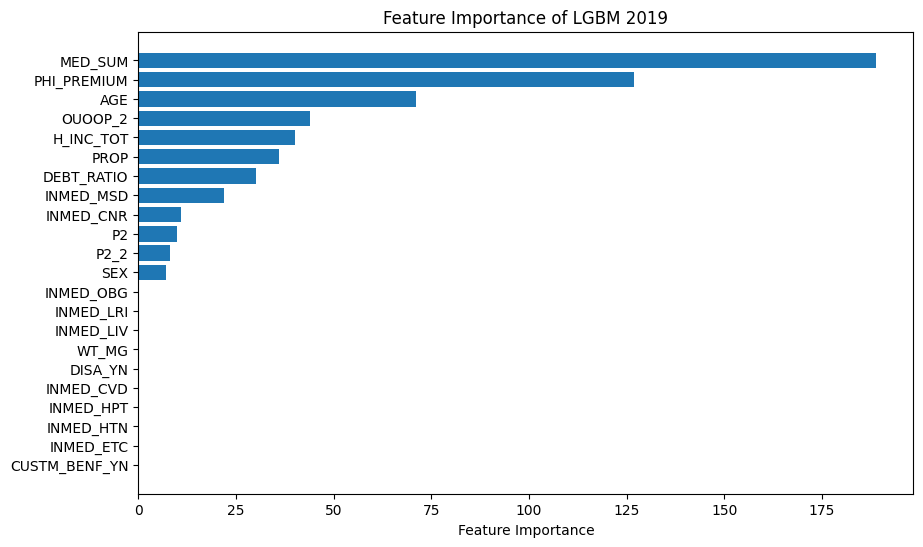

In [ ]:
import matplotlib.pyplot as plt

# 피쳐 중요도 출력
importance = best_lgbm_2019.feature_importances_
feature_names = X_train_2019.columns

# 피쳐 중요도를 데이터프레임으로 묶고, 중요도 기준으로 내림차순 정렬
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

# 중요도 기준으로 내림차순 정렬
importance_df = importance_df.sort_values(by='Importance')

# 피쳐 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance of LGBM 2019')
plt.show()

### 2020년 데이터 학습

In [ ]:
# 데이터 분할
data_2020 = df_2020.copy()
X_train_2020, X_test_2020, y_train_2020, y_test_2020 = train_test_split(
    data_2020.drop("PHI_BENEFIT", axis=1),
    data_2020["PHI_BENEFIT"],
    test_size=0.2,
    random_state=42
)

# 새로운 데이터에서 GridSearchCV 실행
grid_search.fit(X_train_2020, y_train_2020)

# 새로운 데이터에서 최적화된 모델 저장
best_lgbm_2020 = grid_search.best_estimator_

print("Best Hyperparameters (New Data):", grid_search.best_params_)

#Early Stopping 설정
early_stopping_callback = early_stopping(stopping_rounds=5, verbose=True)

#점진적 학습 진행 (early stopping 적용)
best_lgbm_2020 = best_lgbm_2020.fit(
    X_train_2020, y_train_2020,
    init_model=best_lgbm_2019,  # 이전 모델 유지
    eval_set=[(X_test_2020, y_test_2020)],  # 검증 데이터 추가
    callbacks=[early_stopping_callback]  # Early Stopping 적용
)

# 트리 개수 확인
print(f"트리 수: {best_lgbm_2020.booster_.num_trees()}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1644
[LightGBM] [Info] Number of data points in the train set: 1349, number of used features: 20
[LightGBM] [Info] Start training from score 14.045655
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

In [ ]:
# 예측 및 성능 평가
y_pred_train_2020 = best_lgbm_2020.predict(X_train_2020)
y_pred_test_2020 = best_lgbm_2020.predict(X_test_2020)

# 19+20년도 훈련 데이터 합치기
X_train_combined = pd.concat([X_train_2019, X_train_2020], axis=0)
y_train_combined = pd.concat([y_train_2019, y_train_2020], axis=0)

# 19+20년도 테스트 데이터 합치기
X_test_combined = pd.concat([X_test_2019, X_test_2020], axis=0)
y_test_combined = pd.concat([y_test_2019, y_test_2020], axis=0)

# 최종 모델로 19+20년도 데이터 예측
y_pred_train_combined = best_lgbm_2020.predict(X_train_combined)
y_pred_test_combined = best_lgbm_2020.predict(X_test_combined)

# 성능 평가 (Train & Test)
mse_train_combined = mean_squared_error(y_train_combined, y_pred_train_combined)
rmse_train_combined = np.sqrt(mse_train_combined)
mae_train_combined = mean_absolute_error(y_train_combined, y_pred_train_combined)
r2_train_combined = r2_score(y_train_combined, y_pred_train_combined)

mse_test_combined = mean_squared_error(y_test_combined, y_pred_test_combined)
rmse_test_combined = np.sqrt(mse_test_combined)
mae_test_combined = mean_absolute_error(y_test_combined, y_pred_test_combined)
r2_test_combined = r2_score(y_test_combined, y_pred_test_combined)

# 결과 출력 (19+20년도 성능 평가)
print("--- Training Set Performance (19+20년도) ---")
print(f"MSE: {mse_train_combined:.4f}")
print(f"RMSE: {rmse_train_combined:.4f}")
print(f"MAE: {mae_train_combined:.4f}")
print(f"R² Score: {r2_train_combined:.4f}\n")

print("--- Test Set Performance (19+20년도) ---")
print(f"MSE: {mse_test_combined:.4f}")
print(f"RMSE: {rmse_test_combined:.4f}")
print(f"MAE: {mae_test_combined:.4f}")
print(f"R² Score: {r2_test_combined:.4f}\n")

--- Training Set Performance (19+20년도) ---
MSE: 5.4532
RMSE: 2.3352
MAE: 1.1058
R² Score: 0.8514

--- Test Set Performance (19+20년도) ---
MSE: 5.8588
RMSE: 2.4205
MAE: 1.2065
R² Score: 0.8622



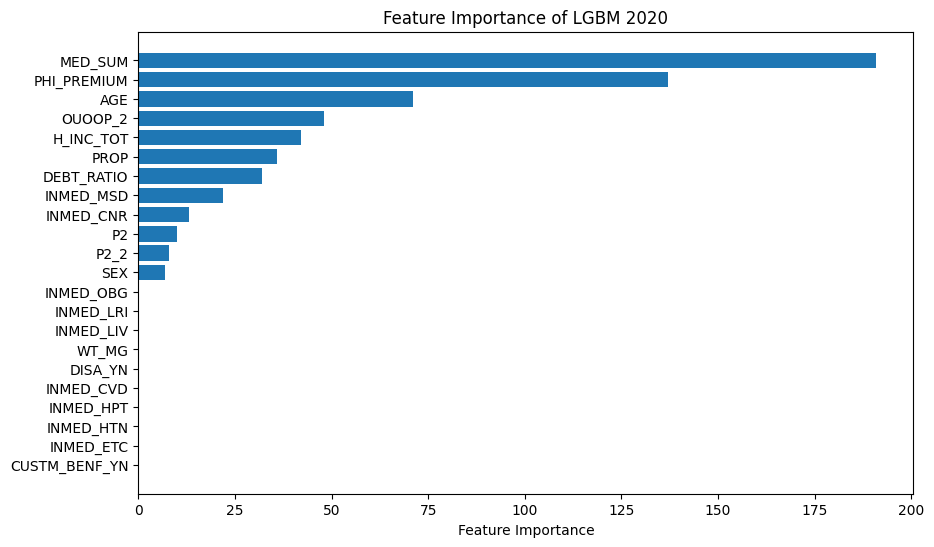

In [ ]:
import matplotlib.pyplot as plt

# 피쳐 중요도 출력
importance = best_lgbm_2020.feature_importances_
feature_names = X_train_2020.columns

# 피쳐 중요도를 데이터프레임으로 묶고, 중요도 기준으로 내림차순 정렬
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

# 중요도 기준으로 내림차순 정렬
importance_df = importance_df.sort_values(by='Importance')

# 피쳐 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance of LGBM 2020')
plt.show()

### 2021년 데이터

In [ ]:
# 데이터 분할
data_2021 = df_2021.copy()
X_train_2021, X_test_2021, y_train_2021, y_test_2021 = train_test_split(
    data_2021.drop("PHI_BENEFIT", axis=1),
    data_2021["PHI_BENEFIT"],
    test_size=0.2,
    random_state=42
)

# 새로운 데이터에서 GridSearchCV 실행
grid_search.fit(X_train_2021, y_train_2021)

# 새로운 데이터에서 최적화된 모델 저장
best_lgbm_2021 = grid_search.best_estimator_

print("Best Hyperparameters (New Data):", grid_search.best_params_)

# 점진적 학습 진행
best_lgbm_2021 = best_lgbm_2021.fit(X_train_2021, y_train_2021, init_model=best_lgbm_2020)

# 트리 개수 확인
print(f"트리 수: {best_lgbm_2021.booster_.num_trees()}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1655
[LightGBM] [Info] Number of data points in the train set: 1425, number of used features: 20
[LightGBM] [Info] Start training from score 13.799286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 19년도, 20년도, 21년도 Train-Test 데이터 준비
X_train_2019, X_test_2019, y_train_2019, y_test_2019 = train_test_split(
    df_2019.drop("PHI_BENEFIT", axis=1), df_2019["PHI_BENEFIT"], test_size=0.2, random_state=42
)

X_train_2020, X_test_2020, y_train_2020, y_test_2020 = train_test_split(
    df_2020.drop("PHI_BENEFIT", axis=1), df_2020["PHI_BENEFIT"], test_size=0.2, random_state=42
)

X_train_2021, X_test_2021, y_train_2021, y_test_2021 = train_test_split(
    df_2021.drop("PHI_BENEFIT", axis=1), df_2021["PHI_BENEFIT"], test_size=0.2, random_state=42
)

# 19+20+21년도 훈련 데이터 합치기
X_train_combined = pd.concat([X_train_2019, X_train_2020, X_train_2021], axis=0)
y_train_combined = pd.concat([y_train_2019, y_train_2020, y_train_2021], axis=0)

# 19+20+21년도 테스트 데이터 합치기
X_test_combined = pd.concat([X_test_2019, X_test_2020, X_test_2021], axis=0)
y_test_combined = pd.concat([y_test_2019, y_test_2020, y_test_2021], axis=0)

# 21년도까지 학습된 모델(`best_lgbm_2021`)로 19+20+21년도 데이터 예측
y_pred_train_combined = best_lgbm_2021.predict(X_train_combined)
y_pred_test_combined = best_lgbm_2021.predict(X_test_combined)

# 성능 평가 (Train & Test)
mse_train_combined = mean_squared_error(y_train_combined, y_pred_train_combined)
rmse_train_combined = np.sqrt(mse_train_combined)
mae_train_combined = mean_absolute_error(y_train_combined, y_pred_train_combined)
r2_train_combined = r2_score(y_train_combined, y_pred_train_combined)

mse_test_combined = mean_squared_error(y_test_combined, y_pred_test_combined)
rmse_test_combined = np.sqrt(mse_test_combined)
mae_test_combined = mean_absolute_error(y_test_combined, y_pred_test_combined)
r2_test_combined = r2_score(y_test_combined, y_pred_test_combined)

# 결과 출력 (19+20+21년도 성능 평가)
print("--- Training Set Performance (19+20+21년도) ---")
print(f"MSE: {mse_train_combined:.4f}")
print(f"RMSE: {rmse_train_combined:.4f}")
print(f"MAE: {mae_train_combined:.4f}")
print(f"R² Score: {r2_train_combined:.4f}\n")

print("--- Test Set Performance (19+20+21년도) ---")
print(f"MSE: {mse_test_combined:.4f}")
print(f"RMSE: {rmse_test_combined:.4f}")
print(f"MAE: {mae_test_combined:.4f}")
print(f"R² Score: {r2_test_combined:.4f}")


--- Training Set Performance (19+20+21년도) ---
MSE: 4.2335
RMSE: 2.0576
MAE: 1.0073
R² Score: 0.8585

--- Test Set Performance (19+20+21년도) ---
MSE: 4.9818
RMSE: 2.2320
MAE: 1.1337
R² Score: 0.8500


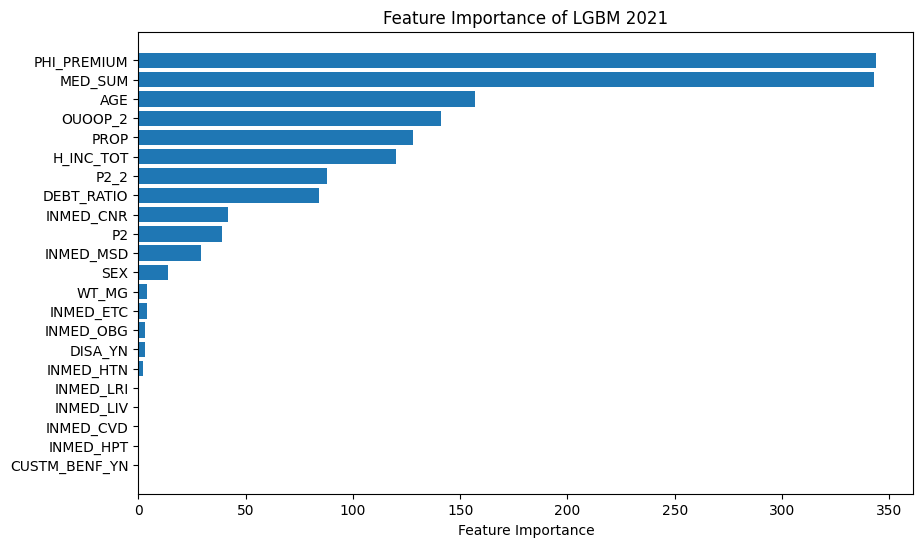

In [ ]:
import matplotlib.pyplot as plt

# 피쳐 중요도 출력
importance = best_lgbm_2021.feature_importances_
feature_names = X_train_2021.columns

# 피쳐 중요도를 데이터프레임으로 묶고, 중요도 기준으로 내림차순 정렬
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

# 중요도 기준으로 내림차순 정렬
importance_df = importance_df.sort_values(by='Importance')

# 피쳐 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance of LGBM 2021')
plt.show()

# Other models(XGB, RF, OLS, Lasso)

## 데이터 불러오기

In [ ]:
df_all=pd.read_csv('df_all')

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4517 entries, 0 to 1781
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PHI_BENEFIT    4517 non-null   float64
 1   PHI_PREMIUM    4517 non-null   float64
 2   H_INC_TOT      4517 non-null   float64
 3   DEBT_RATIO     4517 non-null   float64
 4   PROP           4517 non-null   float64
 5   CUSTM_BENF_YN  4517 non-null   float64
 6   P2             4517 non-null   float64
 7   P2_2           4517 non-null   float64
 8   SEX            4517 non-null   float64
 9   DISA_YN        4517 non-null   float64
 10  AGE            4517 non-null   float64
 11  WT_MG          4517 non-null   int64  
 12  INMED_CNR      4517 non-null   float64
 13  INMED_CVD      4517 non-null   float64
 14  INMED_ETC      4517 non-null   float64
 15  INMED_HPT      4517 non-null   float64
 16  INMED_HTN      4517 non-null   float64
 17  INMED_LIV      4517 non-null   float64
 18  INMED_LRI    

## XGB

In [ ]:
data = df_all.copy()

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("PHI_BENEFIT", axis=1),
    data["PHI_BENEFIT"],
    test_size=0.2,
    random_state=42
)

# XGBRegressor 모델 정의 (하이퍼파라미터 설정)
XGB = XGBRegressor(
    max_depth=3,             # 트리의 최대 깊이
    n_estimators=1000,       # 최대 1000개의 트리
    objective="reg:squarederror",  # 회귀 문제
    eval_metric="mae", # 평가 지표 (MAE)
    early_stopping_rounds=5
)

# 학습 (early stopping 설정)
XGB.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],  # 검증 세트 제공
    verbose=True
)

# 예측
y_pred_train = XGB.predict(X_train)
y_pred_test = XGB.predict(X_test)

# 성능 평가
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# 결과 출력
print("--- Training Set Performance ---")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAE: {mae_train:.4f}")
print(f"R² Score: {r2_train:.4f}\n")

print("--- Test Set Performance ---")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"R² Score: {r2_test:.4f}")

[0]	validation_0-mae:1.96591
[1]	validation_0-mae:1.55624
[2]	validation_0-mae:1.28557
[3]	validation_0-mae:1.13073
[4]	validation_0-mae:1.05100
[5]	validation_0-mae:1.00532
[6]	validation_0-mae:0.98500
[7]	validation_0-mae:0.97322
[8]	validation_0-mae:0.97265
[9]	validation_0-mae:0.96643
[10]	validation_0-mae:0.96168
[11]	validation_0-mae:0.96027
[12]	validation_0-mae:0.96257
[13]	validation_0-mae:0.95954
[14]	validation_0-mae:0.95320
[15]	validation_0-mae:0.95672
[16]	validation_0-mae:0.95780
[17]	validation_0-mae:0.95857
[18]	validation_0-mae:0.95850
--- Training Set Performance ---
MSE: 1.8119
RMSE: 1.3461
MAE: 0.9446
R² Score: 0.9419

--- Test Set Performance ---
MSE: 2.3075
RMSE: 1.5191
MAE: 0.9532
R² Score: 0.9181


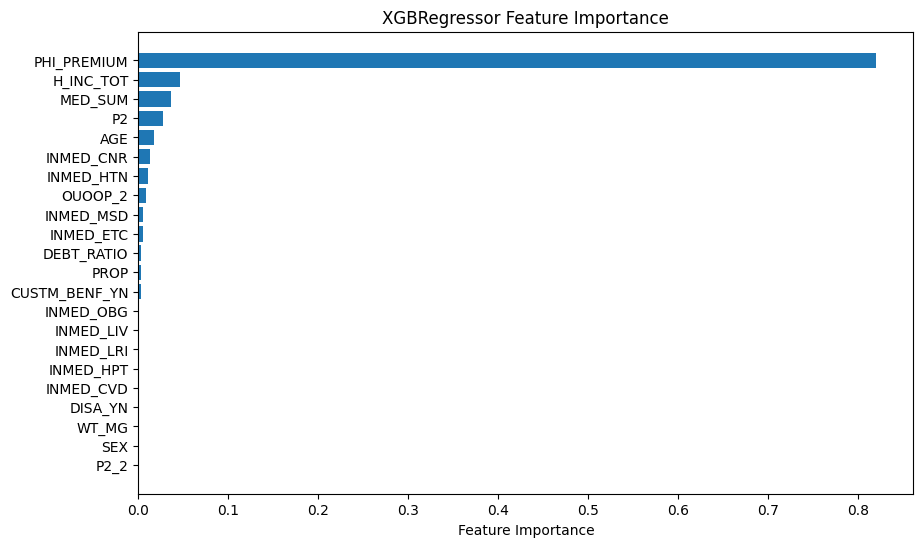

In [ ]:
import matplotlib.pyplot as plt

# 피쳐 중요도 출력
importance = XGB.feature_importances_
feature_names = X_train.columns

# 피쳐 중요도와 피쳐 이름을 데이터프레임으로 묶어서 정렬
import pandas as pd

# 피쳐 중요도를 데이터프레임으로 묶고, 중요도 기준으로 내림차순 정렬
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

# 중요도 기준으로 내림차순 정렬
importance_df = importance_df.sort_values(by='Importance')

# 피쳐 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('XGBRegressor Feature Importance')
plt.show()

## 랜덤 포레스트

In [ ]:
data = df_all.copy()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("PHI_BENEFIT", axis=1),
    data["PHI_BENEFIT"],
    test_size=0.2,
    random_state=42
)

# 랜덤 포레스트 회귀 모델 생성 및 학습
rf_model = RandomForestRegressor(
    max_depth=3,             # 트리의 최대 깊이
    n_estimators=1000)       # 최대 1000개의 트리
rf_model.fit(X_train, y_train)

# 학습 데이터에 대한 예측
y_pred_train = rf_model.predict(X_train)

# 테스트 데이터에 대한 예측
y_pred_test = rf_model.predict(X_test)

# 훈련 데이터 성능 지표 계산
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# 테스트 데이터 성능 지표 계산
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# 결과 출력
print("--- Training Set Performance ---")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAE: {mae_train:.4f}")
print(f"R² Score: {r2_train:.4f}\n")

print("--- Test Set Performance ---")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"R² Score: {r2_test:.4f}")

--- Training Set Performance ---
MSE: 2.1580
RMSE: 1.4690
MAE: 1.0193
R² Score: 0.9308

--- Test Set Performance ---
MSE: 2.7651
RMSE: 1.6629
MAE: 0.9961
R² Score: 0.9018


### 피처 중요도

In [ ]:
# 모델에 사용된 feature importance 추출
importances = rf_model.feature_importances_

# 특성 이름(컬럼명)은 X 데이터프레임의 컬럼명을 사용
feature_names = X_train.columns

# DataFrame으로 만들어 중요도 순으로 정렬 (상위 20개만 확인하려면 .head(20) 사용)
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

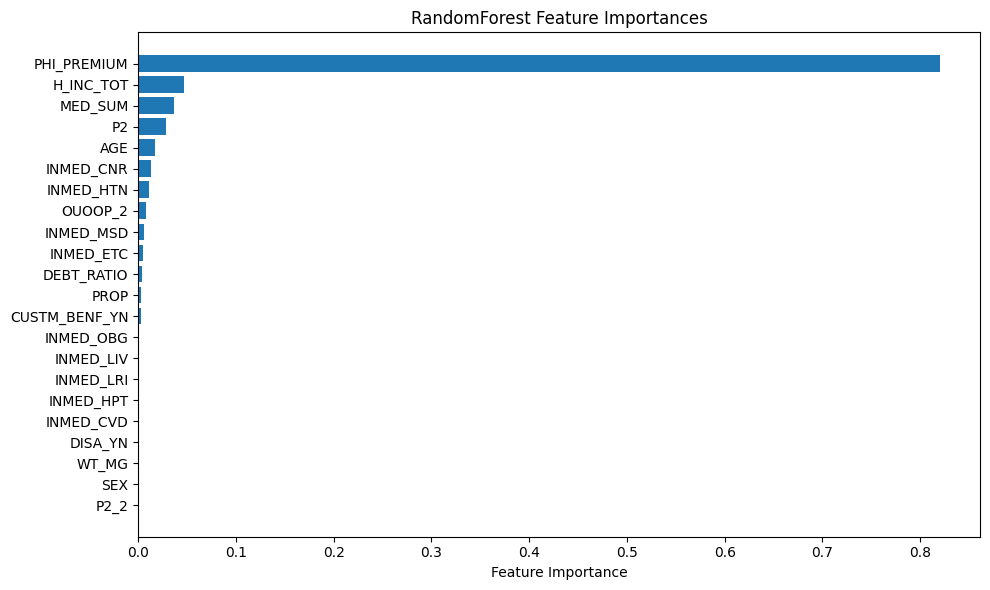

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('RandomForest Feature Importances')
plt.tight_layout()
plt.show()

## 선형회귀모델

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("PHI_BENEFIT", axis=1),
    data["PHI_BENEFIT"],
    test_size=0.2,
    random_state=42
)

# 모델 리스트
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=1),
}

# 모델 학습 및 평가
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # 모델 학습

    # Train 예측 및 평가
    y_train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Test 예측 및 평가
    y_test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    results[name] = {
        "Train": {"MSE": mse_train, "RMSE": rmse_train, "MAE": mae_train, "R²": r2_train},
        "Test": {"MSE": mse_test, "RMSE": rmse_test, "MAE": mae_test, "R²": r2_test}
    }

# 결과 출력 (Train/Test 성능 비교)
for model, metrics in results.items():
    print(f"\n--- {model} ---")
    print("[Train Performance]")
    for metric, value in metrics["Train"].items():
        print(f"{metric}: {value:.4f}")

    print("[Test Performance]")
    for metric, value in metrics["Test"].items():
        print(f"{metric}: {value:.4f}")


--- Linear Regression ---
[Train Performance]
MSE: 2.5982
RMSE: 1.6119
MAE: 1.2004
R²: 0.9167
[Test Performance]
MSE: 2.8829
RMSE: 1.6979
MAE: 1.1820
R²: 0.8976

--- Lasso ---
[Train Performance]
MSE: 2.7933
RMSE: 1.6713
MAE: 1.2356
R²: 0.9104
[Test Performance]
MSE: 3.1525
RMSE: 1.7755
MAE: 1.1829
R²: 0.8881


In [ ]:
# OLS (statsmodels)로 회귀 계수 및 유의성 확인
X_train_const = sm.add_constant(X_train)  # 상수항 추가
ols_model = sm.OLS(y_train, X_train_const)
ols_result = ols_model.fit()

print("\n--- OLS 회귀 분석 결과 ---")
print(ols_result.summary())  # 회귀 계수 + p-value 확인


--- OLS 회귀 분석 결과 ---
                            OLS Regression Results                            
Dep. Variable:            PHI_BENEFIT   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1796.
Date:                Sun, 23 Mar 2025   Prob (F-statistic):               0.00
Time:                        05:45:20   Log-Likelihood:                -6851.5
No. Observations:                3613   AIC:                         1.375e+04
Df Residuals:                    3590   BIC:                         1.389e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.2240

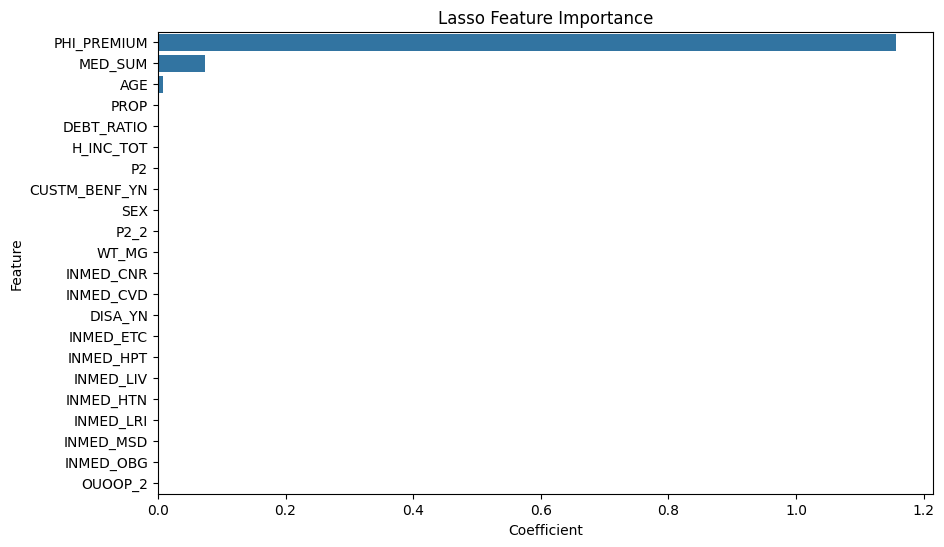

In [ ]:
# Lasso 모델 생성
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

# Lasso 회귀 계수 데이터프레임 생성
lasso_coef_df = pd.DataFrame({"Feature": X_train.columns, "Coefficient": lasso.coef_})
lasso_coef_df = lasso_coef_df.sort_values(by="Coefficient", ascending=False)

# Lasso 회귀 계수 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=lasso_coef_df)
plt.title("Lasso Feature Importance")
plt.show()